In [12]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
data = pd.read_csv("/Users/pulkitchauhan/Downloads/fraudTest.csv")

In [4]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [6]:

data.isnull().values.any()

False

/var/folders/r7/63sb0y8s1c976b6hx4kv1zch0000gn/T/ipykernel_37121/48220730.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_class = pd.value_counts(data["is_fraud"], sort = True)


Text(0.5, 1.0, 'Transaction Class Distribution')

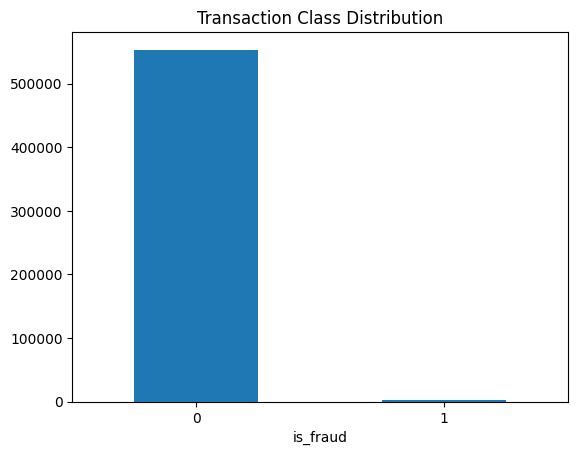

In [15]:
count_class = pd.Series(data["is_fraud"]).value_counts(sort=True)
count_class.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")



In [18]:
fraud = data[data["is_fraud"]==1]
normal = data[data["is_fraud"]== 0 ]

In [19]:
print(fraud.shape,normal.shape)

(2145, 23) (553574, 23)


In [21]:
fraud.amt.describe()

count    2145.000000
mean      528.356494
std       392.747594
min         1.780000
25%       214.510000
50%       371.940000
75%       907.770000
max      1320.920000
Name: amt, dtype: float64

In [22]:
normal.amt.describe()

count    553574.000000
mean         67.614408
std         152.471931
min           1.000000
25%           9.600000
50%          47.150000
75%          82.620000
max       22768.110000
Name: amt, dtype: float64

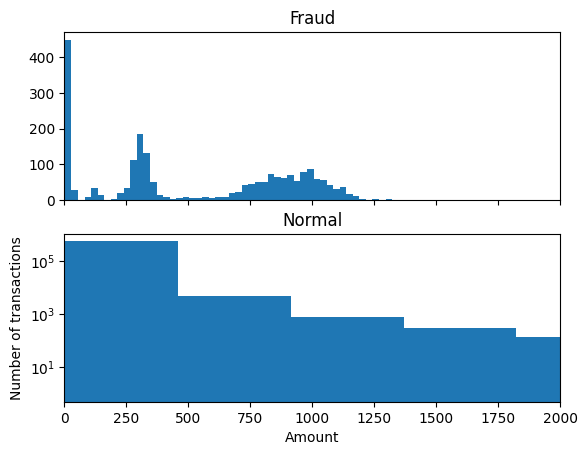

In [31]:


# Assuming 'fraud' and 'normal' are DataFrames with an 'amt' column
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)  # Correct usage of plt.subplots

bins = 50

# Plot for fraud
ax1.hist(fraud['amt'], bins=bins)
ax1.set_title('Fraud')

# Plot for normal
ax2.hist(normal['amt'], bins=bins)
ax2.set_title('Normal')

# Adding labels and customizing the plot
plt.xlabel('Amount')  # Correct string format
plt.ylabel('Number of transactions')
plt.xlim((0, 2000))  # Closing parenthesis here
plt.yscale('log')  # Set y-axis to log scale

plt.show()


In [ ]:
# Plot for fraud
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('time vs amount')
ax1.scatter( fraud.trans_date_trans_time, fraud.amt)
ax1.set_title('Fraud')

# Plot for normal
ax2.scatter( normal.trans_date_trans_time, normal.amt)
ax2.set_title('Normal')

# Adding labels and customizing the plot
plt.xlabel('time secs')  # Correct string format
plt.ylabel('amount')


plt.show()

In [ ]:
#take some sample of the data
data1 = data.sample(frac = 0.1,random_state=1)
data.shape